# Assignment-I Task-2

**Task-2** Classification on Landsat Satellite Data (3 marks): The data set consists of the multi-spectral values of pixels in 3x3 neighbourhoods in a satellite image, and the label information associated with the central pixel in each neighbourhood. This data set was generated from Landsat Multi-Spectral Scanner image data. To facilitate your data analysis process, we have done sampling and data pre-processing for you. All the features are named as “Feature #”, and the last attribute is the label (each number corresponds to a class). This is a multi-class classification problem.

Notes:

1). You need to tune the hyperparameter K for the KNN classifier, and impurity heuristics (information gain or Gini) for the decision tree classifier. Also, the pruning methods could be considered to tune the decision trees.


In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('data/landsat/landsat.csv')
data

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 28,Feature 29,Feature 30,Feature 31,Feature 32,Feature 33,Feature 34,Feature 35,Feature 36,Label
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,51,68,85,71,51,75,93,79,55,75,...,79,56,81,97,79,52,73,93,79,1
5996,55,75,96,79,55,72,93,71,55,72,...,79,52,66,86,72,52,66,82,68,1
5997,55,72,93,71,55,72,85,75,59,79,...,72,52,66,82,68,56,70,82,72,1
5998,55,72,85,75,59,79,93,75,59,91,...,68,56,70,82,72,56,84,97,79,1


In [3]:
# Seperating features into X and label values into y
feature_columns=['Feature 1','Feature 2','Feature 3','Feature 4','Feature 5','Feature 6','Feature 7','Feature 8','Feature 9','Feature 10','Feature 11','Feature 12','Feature 13','Feature 14','Feature 15','Feature 16','Feature 17','Feature 18','Feature 19','Feature 20','Feature 21','Feature 22','Feature 23','Feature 24','Feature 25','Feature 26','Feature 27','Feature 28','Feature 29','Feature 30','Feature 31','Feature 32','Feature 33','Feature 34','Feature 35','Feature 36']
X=data[feature_columns]
y=data['Label']
print(X.head())
print(y.head())

   Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  \
0         92        115        120         94         84        102   
1         84        102        106         79         84        102   
2         84        102        102         83         80        102   
3         80        102        102         79         84         94   
4         84         94        102         79         80         94   

   Feature 7  Feature 8  Feature 9  Feature 10  ...  Feature 27  Feature 28  \
0        106         79         84         102  ...         134         104   
1        102         83         80         102  ...         128         100   
2        102         79         84          94  ...         113          87   
3        102         79         80          94  ...         104          79   
4         98         76         80         102  ...         104          79   

   Feature 29  Feature 30  Feature 31  Feature 32  Feature 33  Feature 34  \
0          88        

In [4]:
# Splitting into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4500, 36)
(4500,)
(1500, 36)
(1500,)


In [5]:
# Let us first build a 1-NN classification model
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)

In [6]:
# training the model
neigh.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [7]:
# model predictions on the test set
y_predictions = neigh.predict(X_test)

In [8]:
# reporting accuracy score on the test set
import sklearn.metrics as metrics
print("Accuracy score on the test set: ", metrics.accuracy_score(y_test, y_predictions))

Accuracy score on the test set:  0.9033333333333333


In [9]:
print(metrics.classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           1       0.98      0.98      0.98       312
           2       0.96      0.97      0.96       156
           3       0.90      0.92      0.91       335
           4       0.74      0.67      0.70       168
           5       0.91      0.88      0.90       164
           7       0.89      0.91      0.90       365

    accuracy                           0.90      1500
   macro avg       0.89      0.89      0.89      1500
weighted avg       0.90      0.90      0.90      1500



In [10]:
#Let us try the KNN classifier with other values of K to find an optimal candidate

scores = {}
scores_list = []
for k in range (2,12): #We will compare accuracy scores for k in range of 2 to 12
    
    knn = KNeighborsClassifier(n_neighbors = k) #for each K, build the model
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred) #calculate accuracy score for each k
    scores_list.append(metrics.accuracy_score(y_test, y_pred)) #store accuracy score of each k in a list

print('Accuracy scores : ', scores_list)
print()
print('Array of Accuracy scores show that when k = 3, accuracy score is highest ('+ str(scores_list[1]) +')')


Accuracy scores :  [0.894, 0.912, 0.8993333333333333, 0.9, 0.892, 0.8966666666666666, 0.8906666666666667, 0.896, 0.892, 0.89]

Array of Accuracy scores show that when k = 3, accuracy score is highest (0.912)


Graph also shows that accuracy score is highest when k = 3


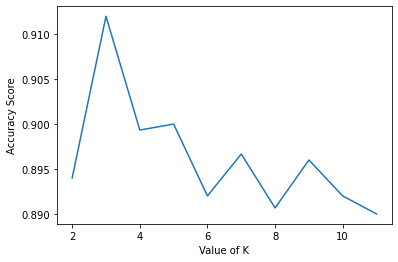

In [11]:
#Let us now plot a graph to compare accuracy scores for all k obtained
k_range = range (2,12)
import matplotlib.pyplot as plt
plt.plot(k_range, scores_list)
plt.xlabel('Value of K')
plt.ylabel('Accuracy Score')
print('Graph also shows that accuracy score is highest when k = 3')

In [12]:
#Let us compare the classifier in terms of another performance metric 'mean error' to confirm our above observation
#that k should be 3

error = []

# Calculating error for K values between 1 and 40
for i in range(2, 12): #In the same range, we again train the model to calculate mean error for each k 
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

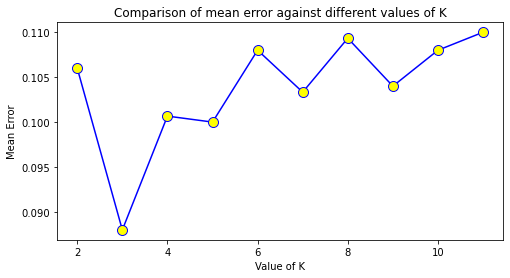

In [13]:
#Let us plot a graph to compare the mean error rate for each k value

plt.figure(figsize=(8, 4))
plt.plot(range(2, 12), error, color='blue', marker='o',
         markerfacecolor='yellow', markersize=10)
plt.title('Comparison of mean error against different values of K')
plt.xlabel('Value of K')
plt.ylabel('Mean Error')


In [14]:
print('We select k = 3 for the following reasons:')
print("The accuracy score array and first graph show that accuracy score is highest when k = 3")
print('The second graph shows that mean error is lowest when k =3')

We select k = 3 for the following reasons:
The accuracy score array and first graph show that accuracy score is highest when k = 3
The second graph shows that mean error is lowest when k =3


In [15]:
from sklearn.tree import DecisionTreeClassifier
#Instantiation of our decision tree
dt = DecisionTreeClassifier(random_state=10)

In [16]:
# Training model on training data
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [17]:
# making predictions on the test set
y_pred = dt.predict(X_test)

In [18]:
# reporting accuracy score on the test set
print("Accuracy score on the test set: ", metrics.accuracy_score(y_test, y_pred))

Accuracy score on the test set:  0.838


In [19]:
#Printing the classification report of our test set
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.93      0.94      0.94       312
           2       0.92      0.93      0.92       156
           3       0.88      0.86      0.87       335
           4       0.54      0.55      0.55       168
           5       0.81      0.76      0.79       164
           7       0.83      0.85      0.84       365

    accuracy                           0.84      1500
   macro avg       0.82      0.82      0.82      1500
weighted avg       0.84      0.84      0.84      1500



In [20]:
clf = DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.        , 0.0001962 , 0.0002    , 0.00020635, 0.00020741,
        0.00021053, 0.00021164, 0.00021256, 0.00021256, 0.00021399,
        0.00021566, 0.00021587, 0.00021852, 0.00022015, 0.00022016,
        0.00022103, 0.00022141, 0.00022174, 0.00022222, 0.00022222,
        0.00022222, 0.00022222, 0.00022222, 0.00022222, 0.00022222,
        0.00022222, 0.00022222, 0.00022222, 0.00022222, 0.00022222,
        0.00022222, 0.00022222, 0.00022222, 0.00022222, 0.00022222,
        0.00022222, 0.00022222, 0.00022222, 0.00022222, 0.00022222,
        0.00022222, 0.00022222, 0.00022222, 0.00022222, 0.0002884 ,
        0.0002963 , 0.0002963 , 0.0002963 , 0.0002963 , 0.0002963 ,
        0.0002963 , 0.0002963 , 0.0002963 , 0.0002963 , 0.0002963 ,
        0.0002963 , 0.0002963 , 0.0002963 , 0.0002963 , 0.0003172 ,
        0.00032898, 0.00032953, 0.00033333, 0.00033333, 0.00033333,
        0.00033333, 0.00033333, 0.00033333, 0.00033333, 0.00033333,
        0.00033333, 0.00033333, 0.

Text(0, 0.5, 'total impurity of leaves')

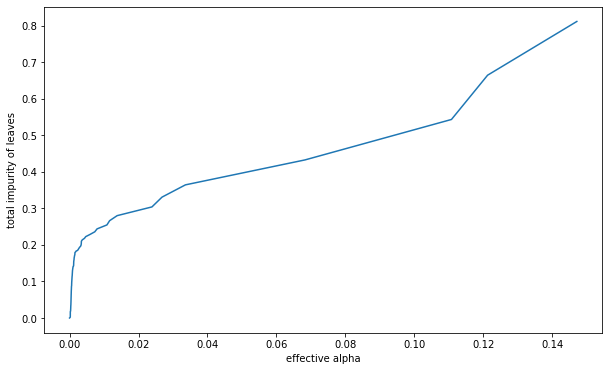

In [21]:
#Pruning technique to see how effective alpha values affect accuracy scores.
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")

In [22]:
clfs = []

for ccp_alpha in ccp_alphas: #Building model with different alpha values
    clf = DecisionTreeClassifier(random_state=10, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'total depth')

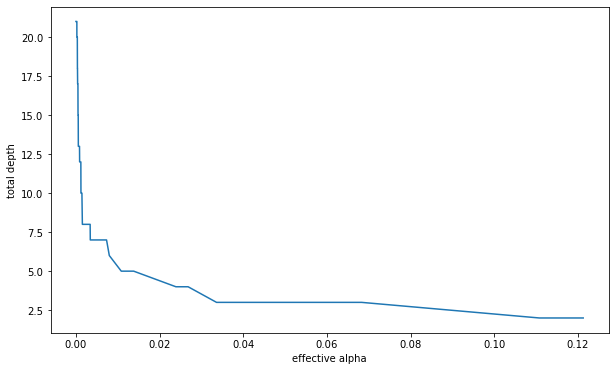

In [23]:
depthOfTree = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], depthOfTree[:-1])
plt.xlabel("effective alpha")
plt.ylabel("total depth")


We can see from the graph that accuracy score is highest when specific values of effective alpha is selected.


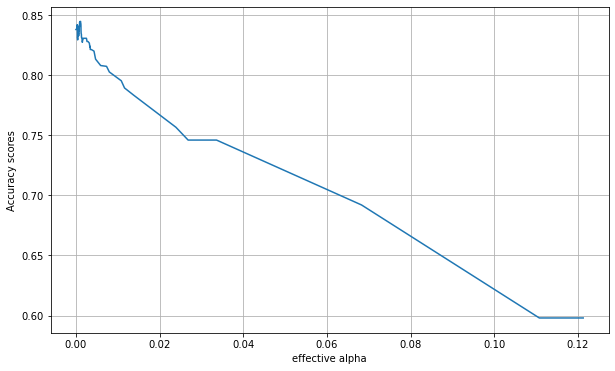

In [24]:
#Let us plot a graph to see how the effective alpha value affects accuracy scores.
from sklearn.metrics import accuracy_score

acc_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]

depthOfTree = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Accuracy scores")
print()
print("We can see from the graph that accuracy score is highest when specific values of effective alpha is selected.")

In [25]:
#Now let us try tuning another hyperparameter 'max_depth'

Dtc = DecisionTreeClassifier(criterion='entropy')
Dtc.fit(X_train, y_train)
y_pred = Dtc.predict(X_test)


In [26]:
# Building the decision tree model
Dtc = DecisionTreeClassifier(criterion='entropy')
Dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Prediction/Testing
y_pred = Dtc.predict(X_test)
# Performance metrics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[299   0   4   0   8   1]
 [  2 143   2   2   5   2]
 [  7   0 291  23   4  10]
 [  1   2  35  83   2  45]
 [ 11   4   1   4 130  14]
 [  1   3   8  37  15 301]]
              precision    recall  f1-score   support

           1       0.93      0.96      0.94       312
           2       0.94      0.92      0.93       156
           3       0.85      0.87      0.86       335
           4       0.56      0.49      0.52       168
           5       0.79      0.79      0.79       164
           7       0.81      0.82      0.82       365

    accuracy                           0.83      1500
   macro avg       0.81      0.81      0.81      1500
weighted avg       0.83      0.83      0.83      1500



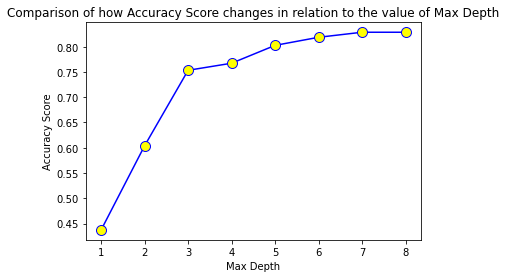


We can see from the graph how selecting different values for max_depth affects accuracy score.


In [28]:
# Tuning the model hypberparameter "max_depth"

max_depths = range(1, 9)
acc_scores = []

for depth in max_depths:
    dTree = DecisionTreeClassifier(max_depth = depth, random_state = 142)
    dTree.fit(X_train, y_train)
    y_pred = dTree.predict(X_test)
    acc_scores.append(accuracy_score(y_test, y_pred))
    
plt.plot(max_depths, acc_scores, color='blue', marker='o', markerfacecolor='yellow', markersize=10)
plt.title('Comparison of how Accuracy Score changes in relation to the value of Max Depth')
plt.xlabel('Max Depth')
plt.xticks(max_depths)
plt.ylabel('Accuracy Score')
plt.show()
print()
print("We can see from the graph how selecting different values for max_depth affects accuracy score.")